# Chart Patter Identifier


## Model Training

Download and extract the dataset

In [1]:
!gdown --id 15Da_awL5sYsOwBNcjVucYBazEoQmaTbQ


/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=15Da_awL5sYsOwBNcjVucYBazEoQmaTbQ
To: /content/DATASET.zip
100% 3.65M/3.65M [00:00<00:00, 218MB/s]


In [2]:
!unzip DATASET.zip


Archive:  DATASET.zip
   creating: DATASET/
   creating: DATASET/output/
  inflating: DATASET/output/Ascending_Triangle.png  
  inflating: DATASET/output/Descending_Triangle.png  
  inflating: DATASET/output/DoubleBottom_Traingle.png  
  inflating: DATASET/output/DoubleTop_Triangle.png  
  inflating: DATASET/output/FallingWedge_Triangle.png  
  inflating: DATASET/output/RisingWedge_Triangle.png  
  inflating: DATASET/output/Symmetrical_Triangle.png  
   creating: DATASET/train_set/
   creating: DATASET/train_set/Ascending_Triangle/
  inflating: DATASET/train_set/Ascending_Triangle/AT_01.jpg  
  inflating: DATASET/train_set/Ascending_Triangle/AT_02.jpg  
  inflating: DATASET/train_set/Ascending_Triangle/AT_03.jpg  
  inflating: DATASET/train_set/Ascending_Triangle/AT_04.jpg  
  inflating: DATASET/train_set/Ascending_Triangle/AT_05.jpg  
  inflating: DATASET/train_set/Ascending_Triangle/AT_06.jpg  
  inflating: DATASET/train_set/Ascending_Triangle/AT_07.jpg  
  inflating: DATASET/train_s

Verify that the data is there

In [3]:
from PIL import Image
from IPython.display import display

In [4]:
im = Image.open('DATASET/train_set/Ascending_Triangle/AT_01.jpg')

In [5]:
!pip install tensorboardcolab

  Preparing metadata (setup.py) ... done
  Created wheel for tensorboardcolab: filename=tensorboardcolab-0.0.22-py3-none-any.whl size=3834 sha256=a5a35916148169478a9e6c2aa264c0b06667ac5a2ba754e85147d1b7e6038998
  Stored in directory: /root/.cache/pip/wheels/8d/ee/46/7fe2bbbf1edbcfeabfaf13962dcaadec1f631d11147fd9d34d
Successfully built tensorboardcolab


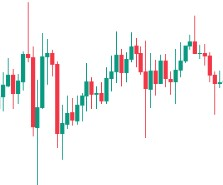

In [6]:
display(im)

In [7]:
import numpy as np
image_arr = np.array(im)
image_arr.shape
image_arr

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

## Module import and variable initialization


In [8]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorboardcolab import TensorBoardColab, TensorBoardColabCallback
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [30]:
# dimensions of our images.
img_width, img_height = 128, 128

In [31]:
train_data_dir = 'DATASET/train_set'
validation_data_dir = 'DATASET/val_set'
nb_train_samples = 140
nb_validation_samples = 70
epochs = 50
batch_size = 32

## Building the CNN model

In [32]:
#New Tensorflow model
input_shape = (img_width, img_height, 3)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3),activation='relu',input_shape=input_shape))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Conv2D(32, (3, 3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))


model.add(tf.keras.layers.Conv2D(64, (3, 3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64,activation='relu'))


d2 = tf.keras.layers.Dense(64,activation='relu')
model.add(d2)

model.add(tf.keras.layers.Dropout(0.5))
d3 =  tf.keras.layers.Dense(7,activation='softmax')
model.add(d3)


model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(7, activation='softmax'))


In [33]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)



In [34]:
weights = d3.get_weights()
weights[1].shape

(7,)

## Formatting data

In [35]:
#this is the data augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1
)

In [36]:
# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 210 images belonging to 7 classes.
Found 70 images belonging to 7 classes.


## Test the data feeders

In [37]:
datum = next(train_generator)
image_batch, label_batch = datum
image_batch.shape
k = 3
image = image_batch[k, ...]
label = label_batch[k, ...]

label

array([0., 0., 0., 1., 0., 0., 0.], dtype=float32)

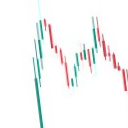

In [38]:
display(Image.fromarray((image * 255).astype(np.uint8)))

In [39]:
image_batch.shape

(32, 128, 128, 3)

## Train the model

In [40]:
model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size,
)

Epoch 1/50


<ipython-input-40-7cacd596c4b8>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(


4/4 [==============================] - 4s 420ms/step - loss: 1.9525 - accuracy: 0.1250 - val_loss: 1.9474 - val_accuracy: 0.1562
Epoch 2/50
4/4 [==============================] - 1s 194ms/step - loss: 1.9520 - accuracy: 0.1406 - val_loss: 1.9461 - val_accuracy: 0.1406
Epoch 3/50
4/4 [==============================] - 1s 113ms/step - loss: 1.9450 - accuracy: 0.1404 - val_loss: 1.9460 - val_accuracy: 0.1562
Epoch 4/50
4/4 [==============================] - 1s 183ms/step - loss: 1.9482 - accuracy: 0.1316 - val_loss: 1.9467 - val_accuracy: 0.1250
Epoch 5/50
4/4 [==============================] - 1s 210ms/step - loss: 1.9508 - accuracy: 0.0965 - val_loss: 1.9456 - val_accuracy: 0.1406
Epoch 6/50
4/4 [==============================] - 1s 199ms/step - loss: 1.9486 - accuracy: 0.1016 - val_loss: 1.9463 - val_accuracy: 0.1562
Epoch 7/50
4/4 [==============================] - 1s 191ms/step - loss: 1.9479 - accuracy: 0.1228 - val_loss: 1.9459 - val_accuracy: 0.1406
Epoch 8/50
4/4 [===============

## Save the weights/Load the weights

In [41]:
model.save_weights('model-4.h5')

In [42]:
model.load_weights('model-4.h5')

## Make predictions with the trained CNN!

In [43]:
from PIL import Image

In [44]:
im = Image.open('/content/DATASET/val_set/Ascending_Triangle/AT_21.jpg')

In [45]:
img = im.resize((128, 128))

In [46]:
img = np.array(img) / 255.

In [47]:
img.shape

(128, 128, 3)

In [48]:
img = img[np.newaxis, ...]

In [49]:
img.shape

(1, 128, 128, 3)

In [50]:
out = model.predict_on_batch(img)

In [51]:
out


array([[0.1663347 , 0.08671733, 0.08710283, 0.2098448 , 0.13897586,
        0.197393  , 0.11363149]], dtype=float32)

In [52]:
np.sum(out)

1.0

In [53]:
from IPython.display import display, HTML, Image

In [54]:
np.argmax(out)

3

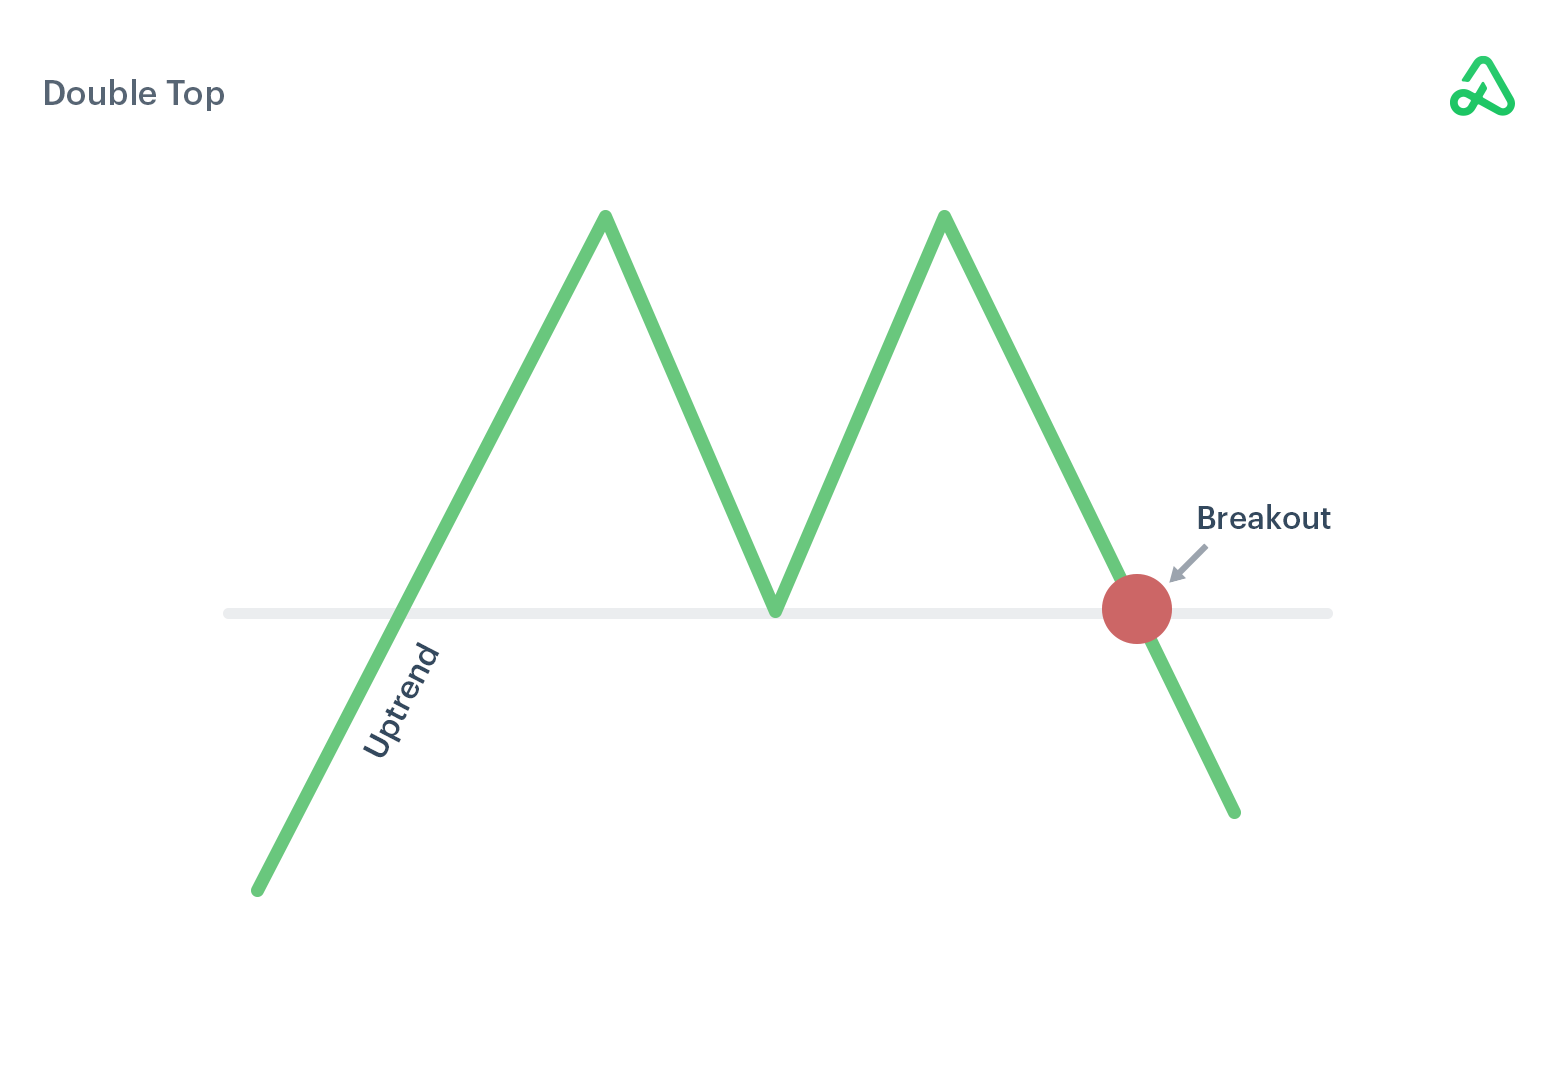

In [56]:
predicted_class=np.argmax(out)

if predicted_class == 0:
    output_text = f"<b>It is an ASCENDING TRIANGLE !!!</b><br><br><b>How To Draw It:</b><br><br><ul><li><b>Identify the Triangle:</b> Locate an ascending triangle pattern on the price chart. It consists of a horizontal resistance line (flat top) and an ascending support line (rising bottom).</li><li><b>Draw the Lines:</b> Draw the horizontal resistance line by connecting the highs where the price repeatedly struggles to break through. Then, draw the ascending support line by connecting the higher lows, showing increasing buying pressure.</li></ul><br><br><b>How To Trade:</b><br><br><ul><li><b>Entry Point:</b>  Initiate a long (buy) position once the price breaks above the horizontal resistance line, confirming the ascending triangle pattern. This breakout is typically a bullish signal.</li><li><b>Stop-Loss Placement:</b> To manage risk, place a stop-loss order just below the ascending support line. This level acts as a protective barrier if the price reverses and moves against your trade.</li><li><b>Take-Profit Level:</b>  Estimate the potential price increase by measuring the height of the triangle (the distance from the horizontal resistance line to the ascending support line) and project this distance upward from the breakout point. This projection can be your initial take-profit target.</li><li><b>Partial Profits and Trailing Stops:</b> Consider taking partial profits at predefined levels as the price moves in your favor. You can also use trailing stop orders to protect profits as the price continues to rise.</li><li><b>Risk Management:</b> Always implement effective risk management techniques, such as not risking more than a predetermined percentage of your trading capital on a single trade.</li></ul><br><br>"
    image_path ='/content/DATASET/output/Ascending_Triangle.png'
elif predicted_class == 1:
    output_text = f"<b>It is a DESCENDING TRIANGLE !!!</b><br><br><b>How To Draw It:</b><br><br><ul><li><b>Identify the Triangle:</b>  Locate a descending triangle pattern on the price chart. It consists of a horizontal support line (flat bottom) and a descending resistance line (sloping down).</li><li><b>Draw the Lines:</b>  Draw the horizontal support line by connecting the lows where the price repeatedly finds buying interest. Then, draw the descending resistance line by connecting the lower highs, indicating increasing selling pressure.</li></ul><br><br><b>How To Trade:</b><br><br><ul><li><b>Entry Point:</b>  Initiate a short (sell) position once the price breaks below the horizontal support line, confirming the descending triangle pattern. This breakout is typically a bearish signal.</li><li><b>Stop-Loss Placement:</b> To manage risk, place a stop-loss order just above the descending resistance line. This level serves as a protective barrier if the price reverses and moves against your trade.</li><li><b>Take-Profit Level:</b>  Estimate the potential price decline by measuring the height of the triangle (the distance from the horizontal support line to the descending resistance line) and project this distance downward from the breakout point. This projection can be your initial take-profit target.</li><li><b>Partial Profits and Trailing Stops:</b> Consider taking partial profits at predefined levels as the price moves in your favor. You can also use trailing stop orders to protect profits as the price continues to decline.</li><li><b>Risk Management:</b>  Always implement effective risk management techniques, such as not risking more than a predetermined percentage of your trading capital on a single trade.</li></ul><br><br>"
    image_path ='/content/DATASET/output/Descending_Triangle.png'
elif predicted_class == 2:
    output_text = f"<b>It is a DOUBLE BOTTOM !!!</b><br><br><b>How To Draw It:</b><br><br><ul><li><b>Identify the Double Bottom:</b>   Locate a double bottom pattern on the price chart. It consists of two distinct troughs (low points) separated by a peak (a higher point) in between.</li><li><b>Draw Support Line:</b>  Connect the lows of the two troughs with a horizontal line. This line represents a strong support level.</li></ul><br><br><b>How To Trade:</b><br><br><ul><li><b>Entry Point:</b>  Initiate a long (buy) position once the price breaks above the peak that separates the two troughs, confirming the double bottom pattern. This breakout is typically a bullish signal.</li><li><b>Stop-Loss Placement:</b> To manage risk, place a stop-loss order just below the support line, which is the lowest point of the pattern. This level acts as a protective barrier if the price reverses and moves against your trade.</li><li><b>Take-Profit Level:</b>  Estimate the potential price increase by measuring the distance from the support line to the peak between the two troughs. Then, project this distance upward from the breakout point. This projection can be your initial take-profit target.</li><li><b>Partial Profits and Trailing Stops:</b> Consider taking partial profits at predefined levels as the price moves in your favor. You can also use trailing stop orders to protect profits as the price continues to rise.</li><li><b>Risk Management:</b>  Implement effective risk management techniques, such as not risking more than a predetermined percentage of your trading capital on a single trade.</li></ul><br><br>"
    image_path ='/content/DATASET/output/DoubleBottom_Traingle.png'
elif predicted_class == 3:
    output_text = f"<b>It is a DOUBLE TOP !!!</b><br><br><b>How To Draw It:</b><br><br><ul><li><b>Identify Peaks:</b> Look for two peaks in the price chart at roughly the same level. These represent resistance points.</li><li><b>Draw Neckline:</b> Connect the lows between the two peaks with a horizontal line. This is your neckline.</li></ul><br><br><b>How To Trade:</b><br><br><ul><li><b>Entry Point:</b> Initiate a short (sell) position once the price breaks below the neckline, confirming the double top pattern. This is typically a bearish signal.</li><li><b>Stop-Loss Placement:</b> To manage risk, place a stop-loss order just above the second peak (the second top). This level serves as a protective barrier if the price reverses and moves against your trade.</li><b>Take-Profit Level:</b> Estimate the potential price decline by measuring the distance from the neckline to the highest point of the pattern. Then, project this distance downward from the breakout point (below the neckline). This projection can be your initial take-profit target.</li><li><b>Partial Profits and Trailing Stops:</b> Consider taking partial profits at predefined levels as the price moves in your favor. Additionally, you may use trailing stop orders to secure profits as the price continues to decline.</li><li><b>Risk Management:</b> Implement sound risk management strategies, such as never risking more than a predetermined percentage of your trading capital on a single trade.</li></ul><br><br>"
    image_path ='/content/DATASET/output/DoubleTop_Triangle.png'
elif predicted_class == 4:
    output_text = f"<b>It is a FALLING WEDGE !!!</b><br><br><b>How To Draw It:</b><br><br><ul><li><b> Identify the Falling Wedge:</b>   Locate a falling wedge pattern on the price chart. It resembles a contracting triangle with converging trendlines, where both the upper and lower lines slope downward.</li><li><b> Draw the Trendlines: b> Draw the upper trendline by connecting the lower highs, and draw the lower trendline by connecting the lower lows. These lines should converge as they extend to the right.<li></ul><br><br><b>How To Trade:</b><br><br><ul><li><b>Entry Point:</b>  Initiate a long (buy) position once the price breaks above the upper trendline of the falling wedge pattern, confirming the breakout. This breakout is typically a bullish signal.</li><li><b>Stop-Loss Placement:</b> To manage risk, place a stop-loss order just below the lower trendline of the falling wedge. This level acts as a protective barrier if the price reverses and moves against your trade.</li><li><b>Take-Profit Level:</b>  Estimate the potential price increase by measuring the height of the widest part of the wedge (from the upper to the lower trendline) and project this distance upward from the breakout point. This projection can be your initial take-profit target.</li><li><b>Partial Profits and Trailing Stops:</b> Consider taking partial profits at predefined levels as the price moves in your favor. You can also use trailing stop orders to protect profits as the price continues to rise.</li><li><b>Risk Management:</b>  Implement effective risk management techniques, such as not risking more than a predetermined percentage of your trading capital on a single trade.</li></ul><br><br>"
    image_path ='/content/DATASET/output/FallingWedge_Triangle.png'
elif predicted_class == 5:
    output_text = f"<b>It is a FALLING WEDGE !!!</b><br><br><b>How To Draw It:</b><br><br><ul><li><b> Identify the Rising Wedge:</b>   Locate a rising wedge pattern on the price chart. It resembles a contracting triangle with converging trendlines, where both the upper and lower lines slope upward.</li><li><b> Draw the Trendlines: b> Draw the upper trendline by connecting the higher highs, and draw the lower trendline by connecting the higher lows. These lines should converge as they extend to the right.<li></ul><br><br><b>How To Trade:</b><br><br><ul><li><b>Entry Point:</b>  Initiate a short (sell) position once the price breaks below the lower trendline of the rising wedge pattern, confirming the breakout. This breakout is typically a bearish signal.</li><li><b>Stop-Loss Placement:</b> To manage risk, place a stop-loss order just above the upper trendline of the rising wedge. This level acts as a protective barrier if the price reverses and moves against your trade.</li><li><b>Take-Profit Level:</b>  Estimate the potential price decline by measuring the height of the widest part of the wedge (from the upper to the lower trendline) and project this distance downward from the breakout point. This projection can be your initial take-profit target.</li><li><b>Partial Profits and Trailing Stops:</b> Consider taking partial profits at predefined levels as the price moves in your favor. You can also use trailing stop orders to protect profits as the price continues to decline.</li><li><b>Risk Management:</b>  Implement effective risk management techniques, such as not risking more than a predetermined percentage of your trading capital on a single trade.</li></ul><br><br>"
    image_path ='/content/DATASET/output/RisingWedge_Triangle.png'
elif predicted_class == 6:
    output_text = f"<b>It is a FALLING WEDGE !!!</b><br><br><b>How To Draw It:</b><br><br><ul><li><b> Identify the Symmetric Triangle:</b>   Locate a symmetric triangle pattern on the price chart. It resembles a contracting triangle with converging trendlines, where both the upper and lower lines slope towards each other.</li><li><b> Draw the Trendlines: b> Draw the upper trendline by connecting the lower highs, and draw the lower trendline by connecting the higher lows. These lines should converge as they extend to the right, forming a symmetrical shape.<li></ul><br><br><b>How To Trade:</b><br><br><ul><li><b>Entry Point:</b>  Wait for a breakout, either above the upper trendline or below the lower trendline, to confirm the direction of the pattern. If the price breaks above the upper trendline, it's typically a bullish signal, and if it breaks below the lower trendline, it's typically a bearish signal.</li><li><b>Stop-Loss Placement:</b To manage risk, place a stop-loss order just outside the triangle on the opposite side of the breakout. For example, if you're trading a bullish breakout, place the stop-loss below the lower trendline. If you're trading a bearish breakout, place it above the upper trendline.</li><li><b>Take-Profit Level:</b>  Determine a target level by measuring the height of the widest part of the triangle (from the upper to the lower trendline) and project this distance in the direction of the breakout. This projection can be your initial take-profit target.</li><li><b>Partial Profits and Trailing Stops:</b> Consider taking partial profits at predefined levels as the price moves in your favor. You can also use trailing stop orders to protect profits as the price continues to move in your direction.</li><li><b>Risk Management:</b>  Implement effective risk management techniques, such as not risking more than a predetermined percentage of your trading capital on a single trade.</li></ul><br><br>"
    image_path ='/content/DATASET/output/Symmetrical_Triangle.png'
else:
    output_text = "Class not recognized."
    image_path ='/content/DATASET/output/Descending_Triangle.png'


#display image
display(Image(filename=image_path))